<a href="https://colab.research.google.com/github/febala86/Tareas-PIA/blob/main/Barbadillo_Lachica_Felix_Tarea04_PIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TAREA ONLINE PIA04
>**Apartado 1:Explora los datos con pandas**
>>* Inicia un nuevo notebook, preferiblemente en Google Colab. Para guiarte en el proceso, puedes utilizar este cuaderno-guía con los fragmentos de código indicados en las celdas de texto, pero tendrás que escribir el código en la celda de código correspondiente y ejecutarlo.

>>* Importa las librerías Numpy y Pandas.

In [3]:
import numpy as np
import pandas as pd

>>* Importa la biblioteca de datasets de Scikit-learn.

In [4]:
import sklearn.datasets

>>* Ejecuta función load_iris de dicha biblioteca, almacena su resultado y echa un vistazo rápido a sus principales elementos 'data', 'feature_names', 'target' y 'target_names'. Investiga sobre este dataset: contenido y estructura, significado, etc

In [44]:
from sklearn.datasets import load_iris
data=load_iris()
print(data['data'])
print(data['feature_names'])
print(data['target'])
print(data['target_names'])

virginica


Se estructuran en un "dataset" de clasificación multiclase donde las clases son setosa, versicolor y virginica.
Se toman 50 muestras de cada clase dando un total de 150 muestras.
Parecen datos de estudio sobre el tamaño (longitud y altura) de los sépalos y pétalos de flores de tipo setosa, versicolor y virginica.

>>* Utiliza la clase DataFrame de Pandas para crear el dataset df, que contendrá los datos guardados en 'data' y utilizando los nombres de columnas almacenados en 'feature_names'

In [73]:

#añadir formato con pretytables from prettytable import PrettyTable
#Tabla= PrettyTable()
#Tabla.add_column("titulo",data) probar


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


>>* Añade la columna "Species" a partir de la secuencia de datos 'target'.

In [54]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['Species'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


>* Añade la columna "Species_Name', a partir de la secuenca 'target_names'. Utiliza la función head para ver los primeros registros del nuevo dataset.

Para crear la otra columna, al tener el array **data['target_names']** menos filas, he asignado los mismos valores que **data['target']** osea los "*150*" registros, para posteriormente poder relacionarlos con **data['target_names']** sustituyendo los datos a posteriori.

La sustituición de los valores de la **columna Species_Name** por los valores obtenidos del array **data['target_names']** , *(que conocemos previamente)*, con la función "*replace*" llamando a los valores a sustituir con el *índice* al array *data['target_names']*.

In [55]:
df['Species_Name']=data.target
df['Species_Name'] =df['Species_Name'].replace({0:data['target_names'][0], 1:data['target_names'][1], 2:data['target_names'][2]})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Species_Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


>>* Utiliza la función **describe** para ver los principales valores estadísticos del dataset.

In [51]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


>**Apartado 2: Visualiza los datos con  Pyplot.**
>>* Utiliza el paquete *Pyplot* para hacer representaciones gráficas de los datos. Importa *Pyplot* de la librería *Matplotlib* y crea una figura tipo *"dispersión de puntos"* **(Scatter plot)** con la variable *sepal length (cm)* en el **eje x** y la variable *sepal width (cm)* en el **eje y**.


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

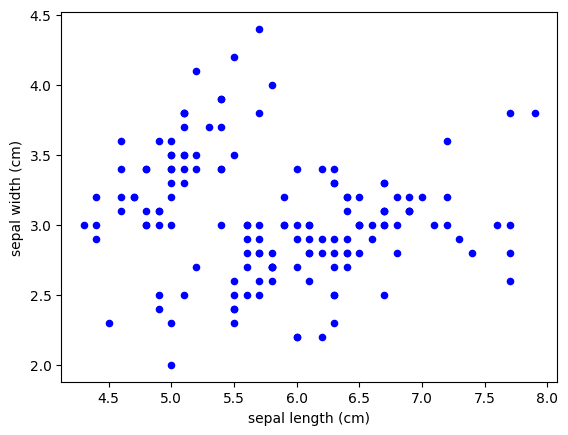

In [64]:
import matplotlib.pyplot as plt
df.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='blue')

>>* Crea otra figura distinguiendo con el color azul la especie "**Setosa**", con el color verde la especie "**Versicolor**" y con color rojo la especie "**Virginica**".

Con ax=fig se genera sobre el mismo gráfico cada dispersión si no lo haría por separado.

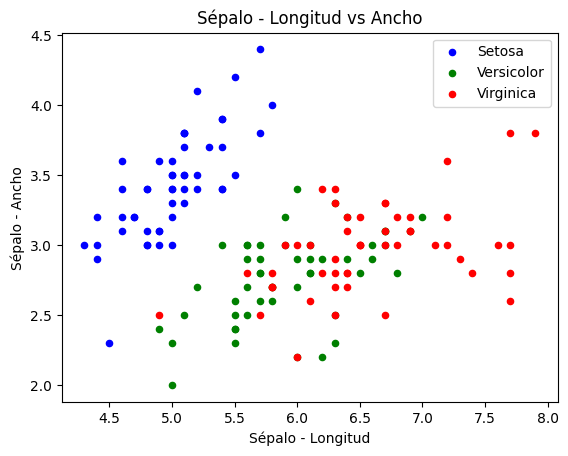

In [66]:
fig = df[df.Species == 0].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='blue', label='Setosa')
df[df.Species == 1].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='green', label='Versicolor', ax=fig)
df[df.Species == 2].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='red', label='Virginica', ax=fig)
fig.set_xlabel('Sépalo - Longitud')
fig.set_ylabel('Sépalo - Ancho')
fig.set_title('Sépalo - Longitud vs Ancho')
plt.show()

>>* Analiza cómo se distribuyen los casos si, en vez de representar según las variables de las dimensiones de los sépalos, utilizas las variables basadas en las dimensiones de los pétalos.
>>>* Representa los datos en una figura tipo scatter, utilizando en el eje x la variable "petal length (cm)" y en el eje y la variable "petal width". De nuevo, distingue las especies con tres colores: color azul la especie "Setosa", con color verde la especie "Versicolor" y con color rojo la especie "Virginica".

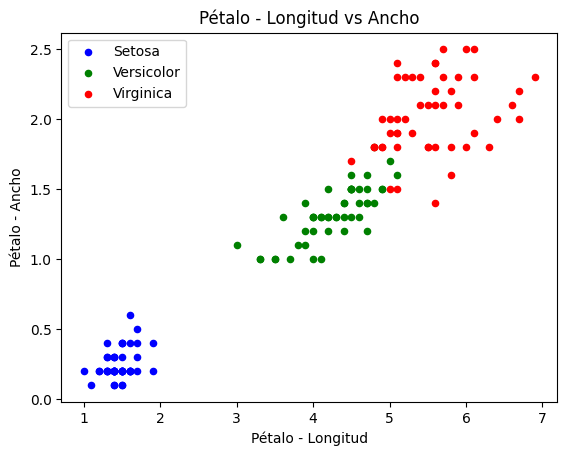

In [78]:
fig = df[df.Species == 0].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', color='blue', label='Setosa')
df[df.Species == 1].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', color='green', label='Versicolor', ax=fig)
df[df.Species == 2].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', color='red', label='Virginica', ax=fig)
fig.set_xlabel('Pétalo - Longitud')
fig.set_ylabel('Pétalo - Ancho')
fig.set_title('Pétalo - Longitud vs Ancho')
plt.show()

>>* Reflexiona sobre los resultados arrojados por las distintas representaciones.

###Figura del Sépalo - Longitud vs Ancho
Nos dice más sobre las similitudes entre las especies Versicolor y Virginica que otra cosa.

De este tamaño se pueden dar hipótesis sobre la semejanza genética de estas especies por ejemplo. Dado que los sépalos ayudan a proteger el brote que comienza a salir podemos inferir también, que el tamaño de la flor cuando nace en estas especies es similar. Esta misma idea puede darnos a entender que la flor en la clase Setosa, cuando nace, es más ancha que el de sus hermanas.
###Figura Pétalo - Longitud vs Ancho

Esta figura me parece más representativa para presentar diferencias entre las distintas especies analizadas en este dataset.

Se puede categorizar mejor cada especie ya que aparecen muy diferenciados los valores obtenidos con respecto al tamaño del pétalo.  La direcencia entre longitud y en el caso de las especies Setosa y Veriscolor es más lineal, siendo la que más se direrencia en este aspecto la Virginica.
Se puede apreciar mayor variabilidad en la longitud del pétalo para las especies Versicolor y Virginica. Siendo la Setosa la que menos varía en este aspecto y por tanto su forma es más redondeada.
>> ¿Qué propiedades nos permiten diferenciar mejor las muestras?

Como indico antes, las propiedades de tamaño del pétalo permiten distinguir mejor las muestras ya que hay menor dispersión por especie.

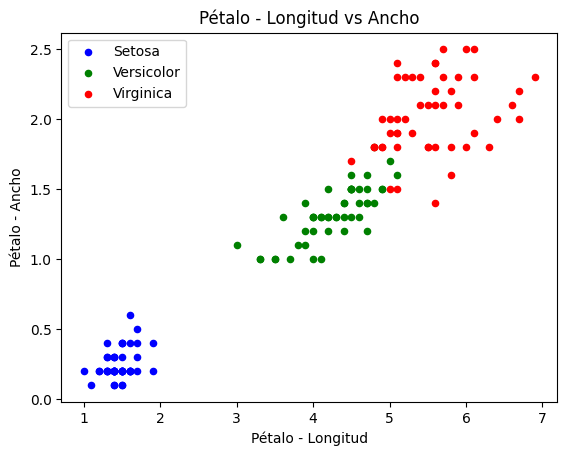

In [79]:
fig = df[df.Species == 0].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', color='blue', label='Setosa')
df[df.Species == 1].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', color='green', label='Versicolor', ax=fig)
df[df.Species == 2].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', color='red', label='Virginica', ax=fig)
fig.set_xlabel('Pétalo - Longitud')
fig.set_ylabel('Pétalo - Ancho')
fig.set_title('Pétalo - Longitud vs Ancho')
plt.show()

> **Apartado 3: Entrena modelos de aprendizaje automático con Scikit-learn.**
>>* Importa los módulos de la librería Scikit-learn que nos permiten hacer un modelo de regresión lineal, un modelo de máquina de vectores soporte, un modelo de tipo los K vecinos más cercanos (KNN), y un modelo de tipo árbol de decisión.

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

>>* Genera el conjunto de datos X con las variables de entrada a los modelos, y el conjunto Y de las etiquetas o variable de salida del modelo, eligiendo para éste último, la variable "Species".

**Variables de entrada al modelo**

Eliminamos las columnas Species y la de Species_Name para después poder usar el train y test en la regresión.

In [113]:
X = df.drop(['Species','Species_Name'],axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Variables de Salida del modelo**

In [114]:
y = df['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

>>* Utiliza la función train_test_split para separar los datos en el conjunto train y test, utilizando el 70% de las muestras para el entrenamiento.

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7) # 70% de las muestras.

>>* Crea un modelo de Regresión Logística. Utiliza la función fit para entrenarlo y utiliza la función predict sobre los datos de test para medir la precisión del modelo. Muestra el valor de dicha precisión con print.

In [161]:
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
predicciones=algoritmo.predict(X_test)
print(predicciones)
LogisticRegressionscore=format(algoritmo.score(X_test, y_test))
print('Precisión Regresión Logística: {}'.format(algoritmo.score(X_test, y_test)))

[1 2 0 2 0 2 2 1 2 1 2 0 1 1 2 0 1 0 0 2 2 1 0 2 1 0 1 2 2 1 1 2 2 2 2 0 1
 1 1 2 2 1 0 0 1 2 0 1 1 1 1 1 0 2 0 2 2 0 1 2 1 0 2 2 0 0 1 1 2 1 2 0 0 1
 1 2 0 0 0 0 1 1 0 2 0 2 1 0 0 2 0 2 2 1 0 1 0 0 2 1 0 2 0 1 2]
Precisión Regresión Logística: 0.9619047619047619


>>* Crea un modelo de SVC o Máquinas de Vectores de Soporte, entrénalo y calcula la precisión utilizando los datos de test. Muestra la precisión.

In [162]:
algoritmo = SVC()
algoritmo.fit(X_train, y_train)
SVCscore=format(algoritmo.score(X_test, y_test))
print('Precisión Máquinas de Vectores de Soporte: {}'.format(algoritmo.score(X_test, y_test)))

Precisión Máquinas de Vectores de Soporte: 0.9523809523809523


>>* Crea un modelo de KNN o K vecinos más cercanos, entrénalo y calcula la precisión utilizando los datos de test. Muestra la precisión.

In [163]:
algoritmo = KNeighborsClassifier()
algoritmo.fit(X_train,y_train)
KNNscore=format(algoritmo.score(X_test, y_test))
print('Precisión modelo de KNN : {}'.format(algoritmo.score(X_test, y_test)))

Precisión modelo de KNN : 0.9714285714285714


>>* Crea un modelo de árbol de decisión, entrénalo y calcula la precisión utilizando los datos de test. Muestra la precisión.

In [156]:
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train,y_train)
arbolscore=format(algoritmo.score(X_test, y_test))
print('Precisión modelo árbol de decisión : {}'.format(algoritmo.score(X_test, y_test)))

Precisión modelo árbol de decisión : 0.9333333333333333


>>* Compara los valores de precisión que has ido consiguiendo en los diferentes modelos. Crea una tabla con los distintas precisiones. Repite el proceso para varias agrupaciones de entrenamiento-test y compara las precisiones. ¿Qué modelo sería el mejor para este dataset?

Crearemos la tabla con PrettyTable que es una biblioteca de Python que permite crear tablas con formato en la consola.

In [172]:
from prettytable import PrettyTable
tabla= PrettyTable()
tabla.add_row([LogisticRegressionscore, SVCscore, KNNscore,arbolscore])
tabla.field_names = ['R.Logística', 'SVC', 'KNN','Árbol de decisión']
print(tabla)


+--------------------+--------------------+--------------------+--------------------+
|    R.Logística     |        SVC         |        KNN         | Árbol de decisión  |
+--------------------+--------------------+--------------------+--------------------+
| 0.9619047619047619 | 0.9523809523809523 | 0.9714285714285714 | 0.9333333333333333 |
+--------------------+--------------------+--------------------+--------------------+


Todos los modelos ofrecen resultados por encima del 90% de precisión aunque para nuestro dataset el que más precisión tiene es el de KNN,  El algoritmo de vecinos cercanos, busca los "k" vecinos más cercanos a un punto de datos y los clasifica o prediciendo su valor en función de la mayoría de los vecinos cercanos.

Como se comentó en el anterior apartado la relación entre especies y tamaño de pétalo es bastante "lineal" y con valores bastante distintos entre especies. Por eso ofrece mayor precisión.


>**Apartado 4: Entrena modelos de aprendizaje automático con pocas variables.**
>>* Imagina que no has podido tener todas las variables, y que solo has conseguido los valores de las medidas de los sépalos, y con esos datos debes entrenar un modelo que acierte con el tipo de especie de flor de iris. Para ello, crea un nuevo dataset que tenga solo las columnas de las dimensiones de los sépalos y la de la especie.

In [183]:
sepalo = df[['sepal length (cm)','sepal width (cm)','Species','Species_Name']]
sepalo.head()

,sepal length (cm),sepal width (cm),Species,Species_Name
0,5.1,3.5,0,setosa
1,4.9,3.0,0,setosa
2,4.7,3.2,0,setosa
3,4.6,3.1,0,setosa
4,5.0,3.6,0,setosa


>>* Separa los datos en X_sepalo para las variables de entrada e y_sepalo para la variable de salida.

In [191]:
y = sepalo['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [192]:
print("Variables de Entrada al Modelo, solo disponemos de los sépalos:")
X = sepalo.drop(['Species','Species_Name'],axis=1)
X.head()

Variables de Entrada al Modelo, solo disponemos de los sépalos:


,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


>>* Separa los datos en un conjunto X_train_s, X_test_s,y_train_s, y_test_s, para entrenamiento y test del modelo.

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

>>* Crea, entrena y mide la precisión de un modelo de Regresión Logística. Muestra la precisión. ¿Es muy diferente al mismo modelo del apartado anterior?.

In [196]:
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
LogisticRegressionscore=format(algoritmo.score(X_test, y_test))
print('Precisión Regresión Logística: {}'.format(algoritmo.score(X_test, y_test)))

Precisión Regresión Logística: 0.8333333333333334


Es bastante distinto al anterior apartado ya que tenemos significativamente menos datos.

>>* Crea, entrena y mide la precisión de un modelo de Máquinas de Vectores Soporte. Muestra la precisión ¿Es muy diferente al mismo tipo de modelo del apartado anterior?.

In [197]:
algoritmo = SVC()
algoritmo.fit(X_train, y_train)
SVCscore=format(algoritmo.score(X_test, y_test))
print('Precisión Máquinas de Vectores de Soporte: {}'.format(algoritmo.score(X_test, y_test)))

Precisión Máquinas de Vectores de Soporte: 0.8666666666666667


>>* Crea, entrena y mide la precisión de un modelo de K vecinos más cercanos. Muestra la precisión ¿Es muy diferente al mismo tipo de modelo del apartado anterior?.

In [198]:
algoritmo = KNeighborsClassifier()
algoritmo.fit(X_train,y_train)
KNNscore=format(algoritmo.score(X_test, y_test))
print('Precisión modelo de KNN : {}'.format(algoritmo.score(X_test, y_test)))

Precisión modelo de KNN : 0.7666666666666667


>>* Crea, entrena y mide la precisión de un modelo de Árbol de decisión. Muestra la precisión ¿Es muy diferente al mismo tipo de modelo del apartado anterior?

In [199]:
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train,y_train)
arbolscore=format(algoritmo.score(X_test, y_test))
print('Precisión modelo árbol de decisión : {}'.format(algoritmo.score(X_test, y_test)))

Precisión modelo árbol de decisión : 0.6333333333333333


>>* Compara los valores de precisión que has ido consiguiendo en los diferentes modelos. ¿Cuál sería el mejor para este dataset?.

In [200]:
from prettytable import PrettyTable
tabla= PrettyTable()
tabla.add_row([LogisticRegressionscore, SVCscore, KNNscore,arbolscore])
tabla.field_names = ['R.Logística', 'SVC', 'KNN','Árbol de decisión']
print(tabla)


+--------------------+--------------------+--------------------+--------------------+
|    R.Logística     |        SVC         |        KNN         | Árbol de decisión  |
+--------------------+--------------------+--------------------+--------------------+
| 0.8333333333333334 | 0.8666666666666667 | 0.7666666666666667 | 0.6333333333333333 |
+--------------------+--------------------+--------------------+--------------------+


Para este dataset el mejor resultado lo da la regresión logística.

#BIBLIOGRAFÍA
Referencia  | Enlace
-------------------|------------------
Google colab       | <a href=https://colab.research.google.com/drive/1a0nFW2ryoEg6pirGk4qBwrY-2Mc_zkP5?authuser=2&hl=es#scrollTo=izIlLhQ1d0vS/>Pincha aquí</a>
Jupiter            | <a href=https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html/>Pincha aquí</a>
El libro de python | <a href=https://ellibrodepython.com/>Pincha aquí</a>
Desarrollo web     | <a href=https://desarrolloweb.com/>Pincha aquí</a>

<div align="LEFT">
<a href=https://github.com/febala86/Tareas-PIA/blob/main/barbadillo_lachica_Felix_PIA03_Tarea.ipynb/>
<img src="https://www.enriquedans.com/wp-content/uploads/2018/06/GitHub-Octocat.jpg" alt="Enlace a github del autor" width="150" height="150"align="justify" /></a>
<p><a href=https://www.enriquedans.com/wp-content/uploads/2018/06/GitHub-Octocat.jpg/><font size="1" color="#87CEEB">Imagen<p/></a></div>